# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import joblib




### Loading Dataset

In [2]:
df1=pd.read_csv("Titanic_train.csv")

In [3]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Handling Missing Values

In [5]:
df1.isnull().sum()  # null values observed in Age , Cabin, Embarked columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df1.drop(columns=['PassengerId','Name','Cabin','Ticket','Parch'],inplace=True)
# Drop irrelevant / problematic columns:
# PassengerId - just an identifier, not useful for prediction
# Name        - mostly unique, no predictive value
# Cabin       - too many missing values (> 50%)
# Ticket      - ticket number, not relevant
# Parch       - only one unique value (0), not useful

In [7]:
df1['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [8]:
df1['Age'] = pd.to_numeric(df1['Age'], errors='coerce')  # Convert non-numeric values to NaN
df1.fillna(df1['Age'].median(), inplace=True)  # Fill NaN values with median
df1.fillna(df1['Embarked'].mode(),inplace=True)
# replace nan with median and mode for numerical and categorical col respectively 

Text(0.5, 0.98, 'Feature Distributions Before Outlier Treatment')

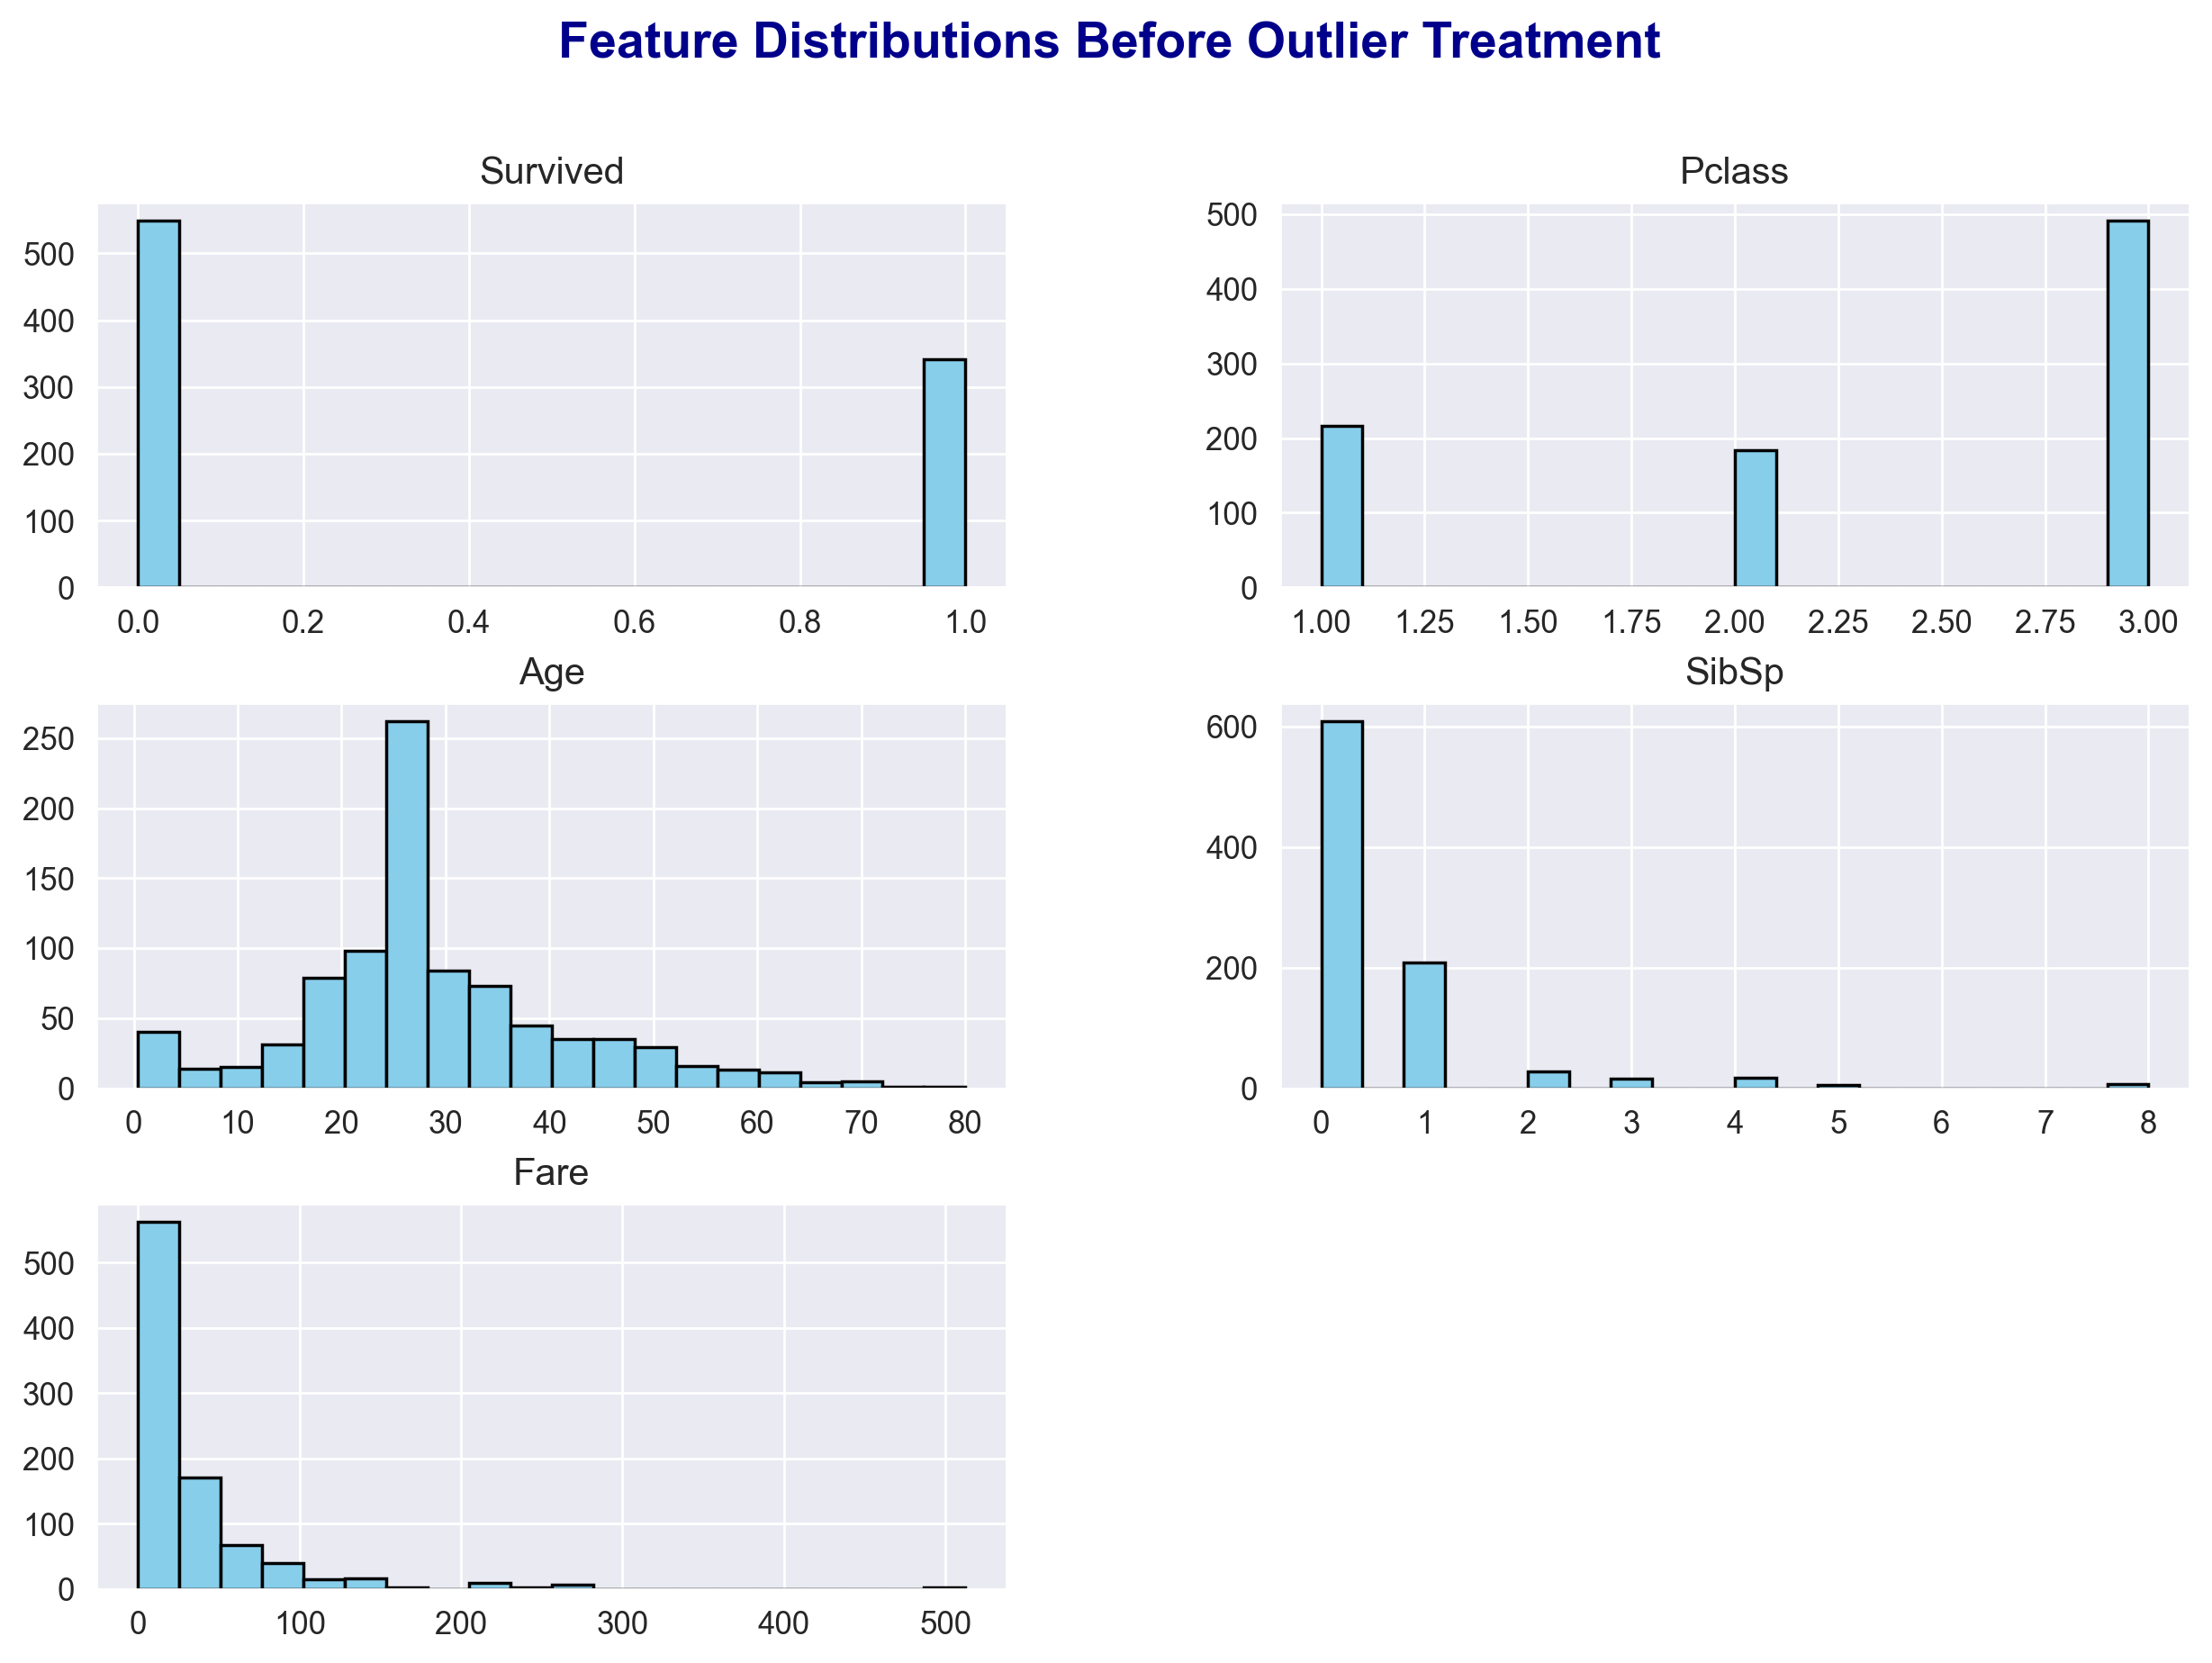

In [9]:
df1.hist(figsize=(12, 8),bins=20,color="skyblue",edgecolor="black")
plt.suptitle("Feature Distributions Before Outlier Treatment", fontsize=16, color="darkblue", weight="bold")

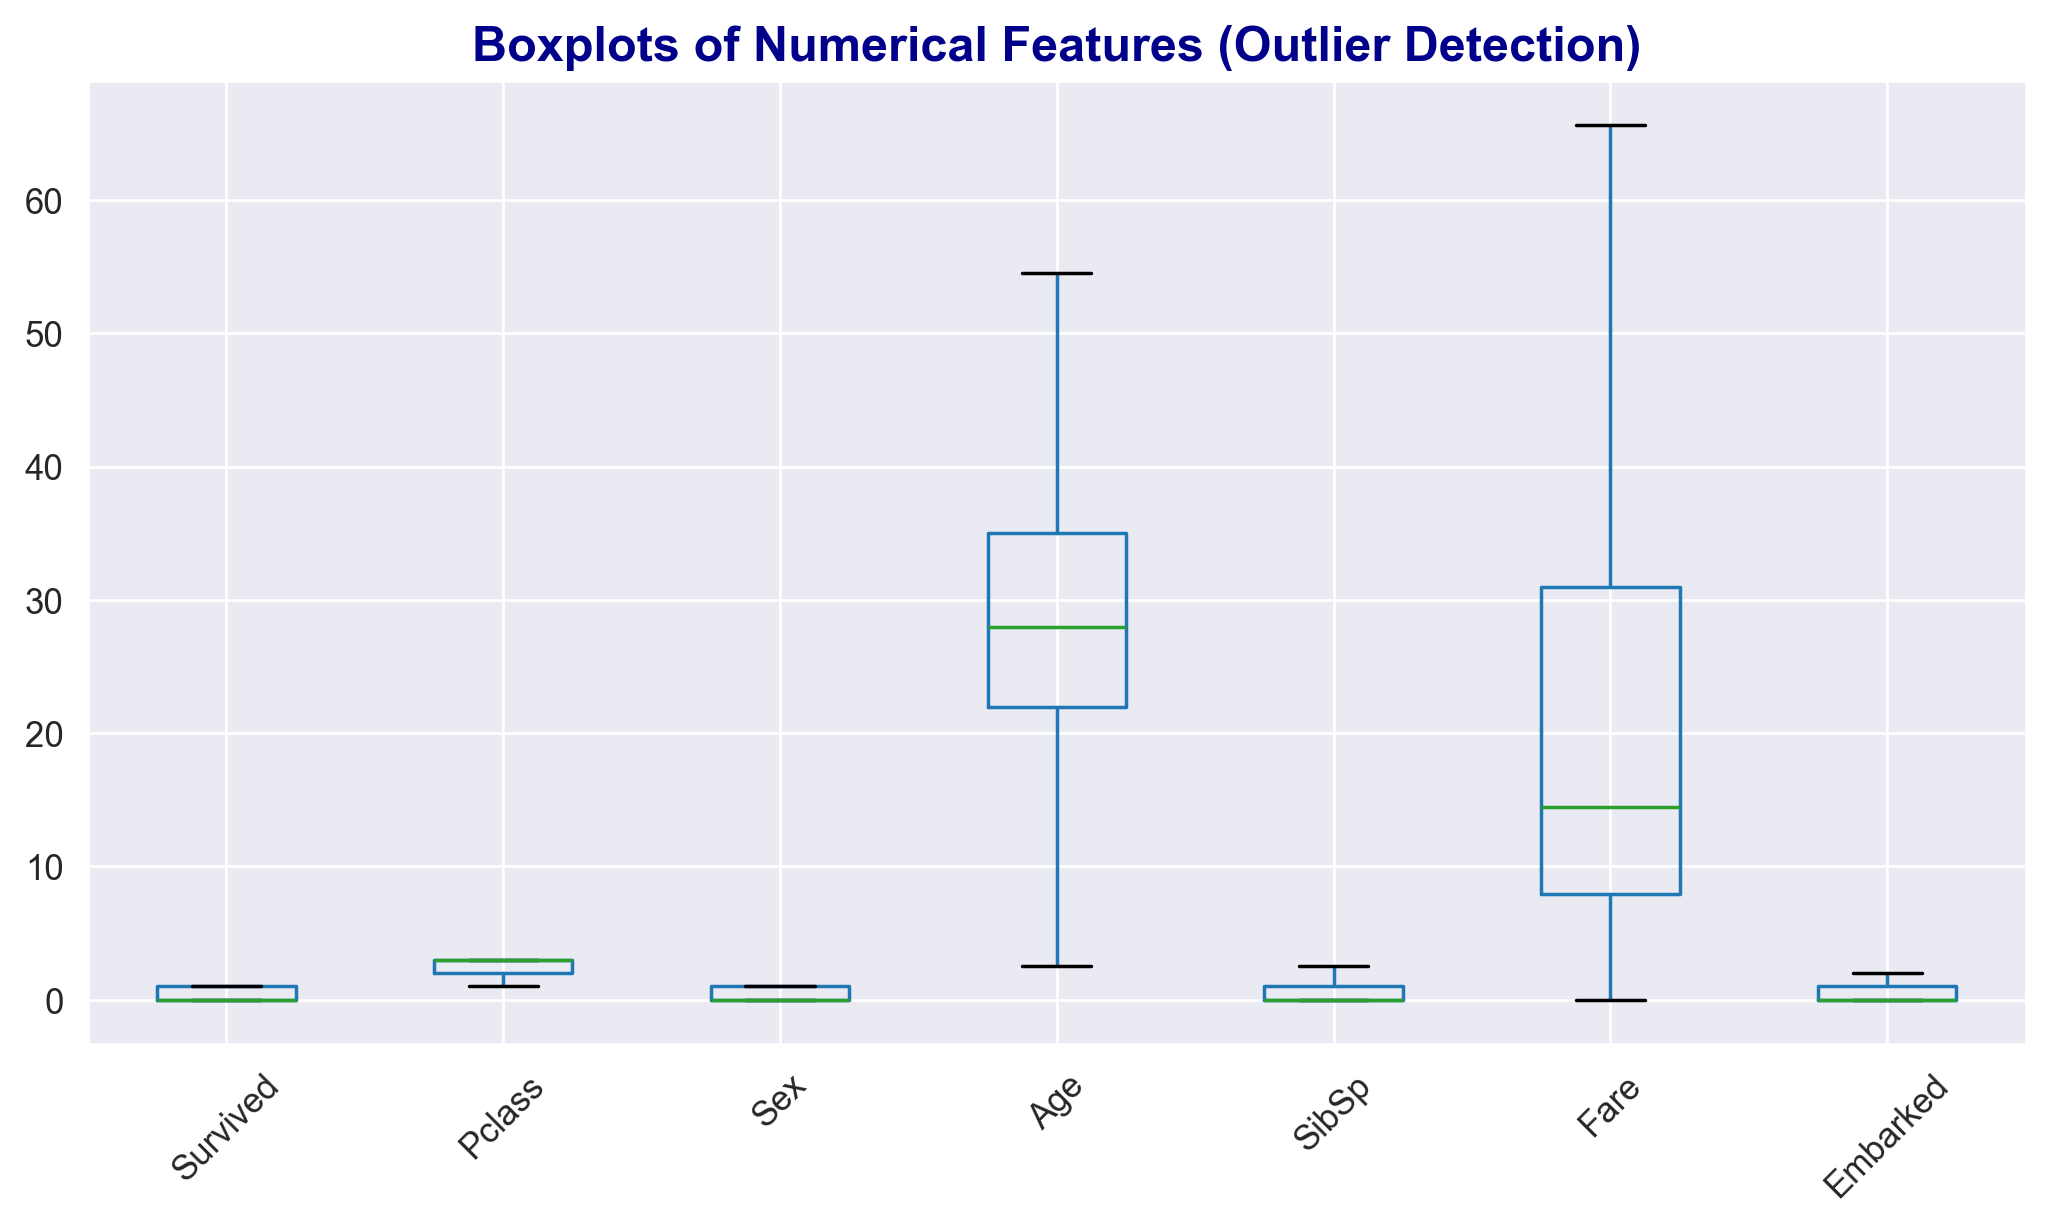

In [31]:
df1.boxplot()
plt.title("Boxplots of Numerical Features (Outlier Detection)", fontsize=14, color="darkblue", weight="bold")
plt.xticks(rotation=45)
plt.show()


In [11]:
outliers_dict = {}


for col in df1.select_dtypes(include=['number']).columns:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers_dict[col] = df1[(df1[col] < lower) | (df1[col] > upper)]


for col, outlier_data in outliers_dict.items():
    print(f"\n{col} Outliers:")
    print(outlier_data.shape[0])
# count of outliers in every column 
# Age Outliers:
# 66
# SibSp Outliers:
# 46
# Fare Outliers:
# 116


Survived Outliers:
0

Pclass Outliers:
0

Age Outliers:
66

SibSp Outliers:
46

Fare Outliers:
116


### Treating outliers


In [12]:
def capping(data,columns):
    for col in columns:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        df1[col]=np.where(df1[col]>upper,upper,np.where(df1[col]<lower,lower,df1[col]))

# capping to replace outliers 

In [13]:
capping(df1,["Fare","SibSp","Age"])

Text(0.5, 0.98, 'Feature Distributions After Outlier Treatment')

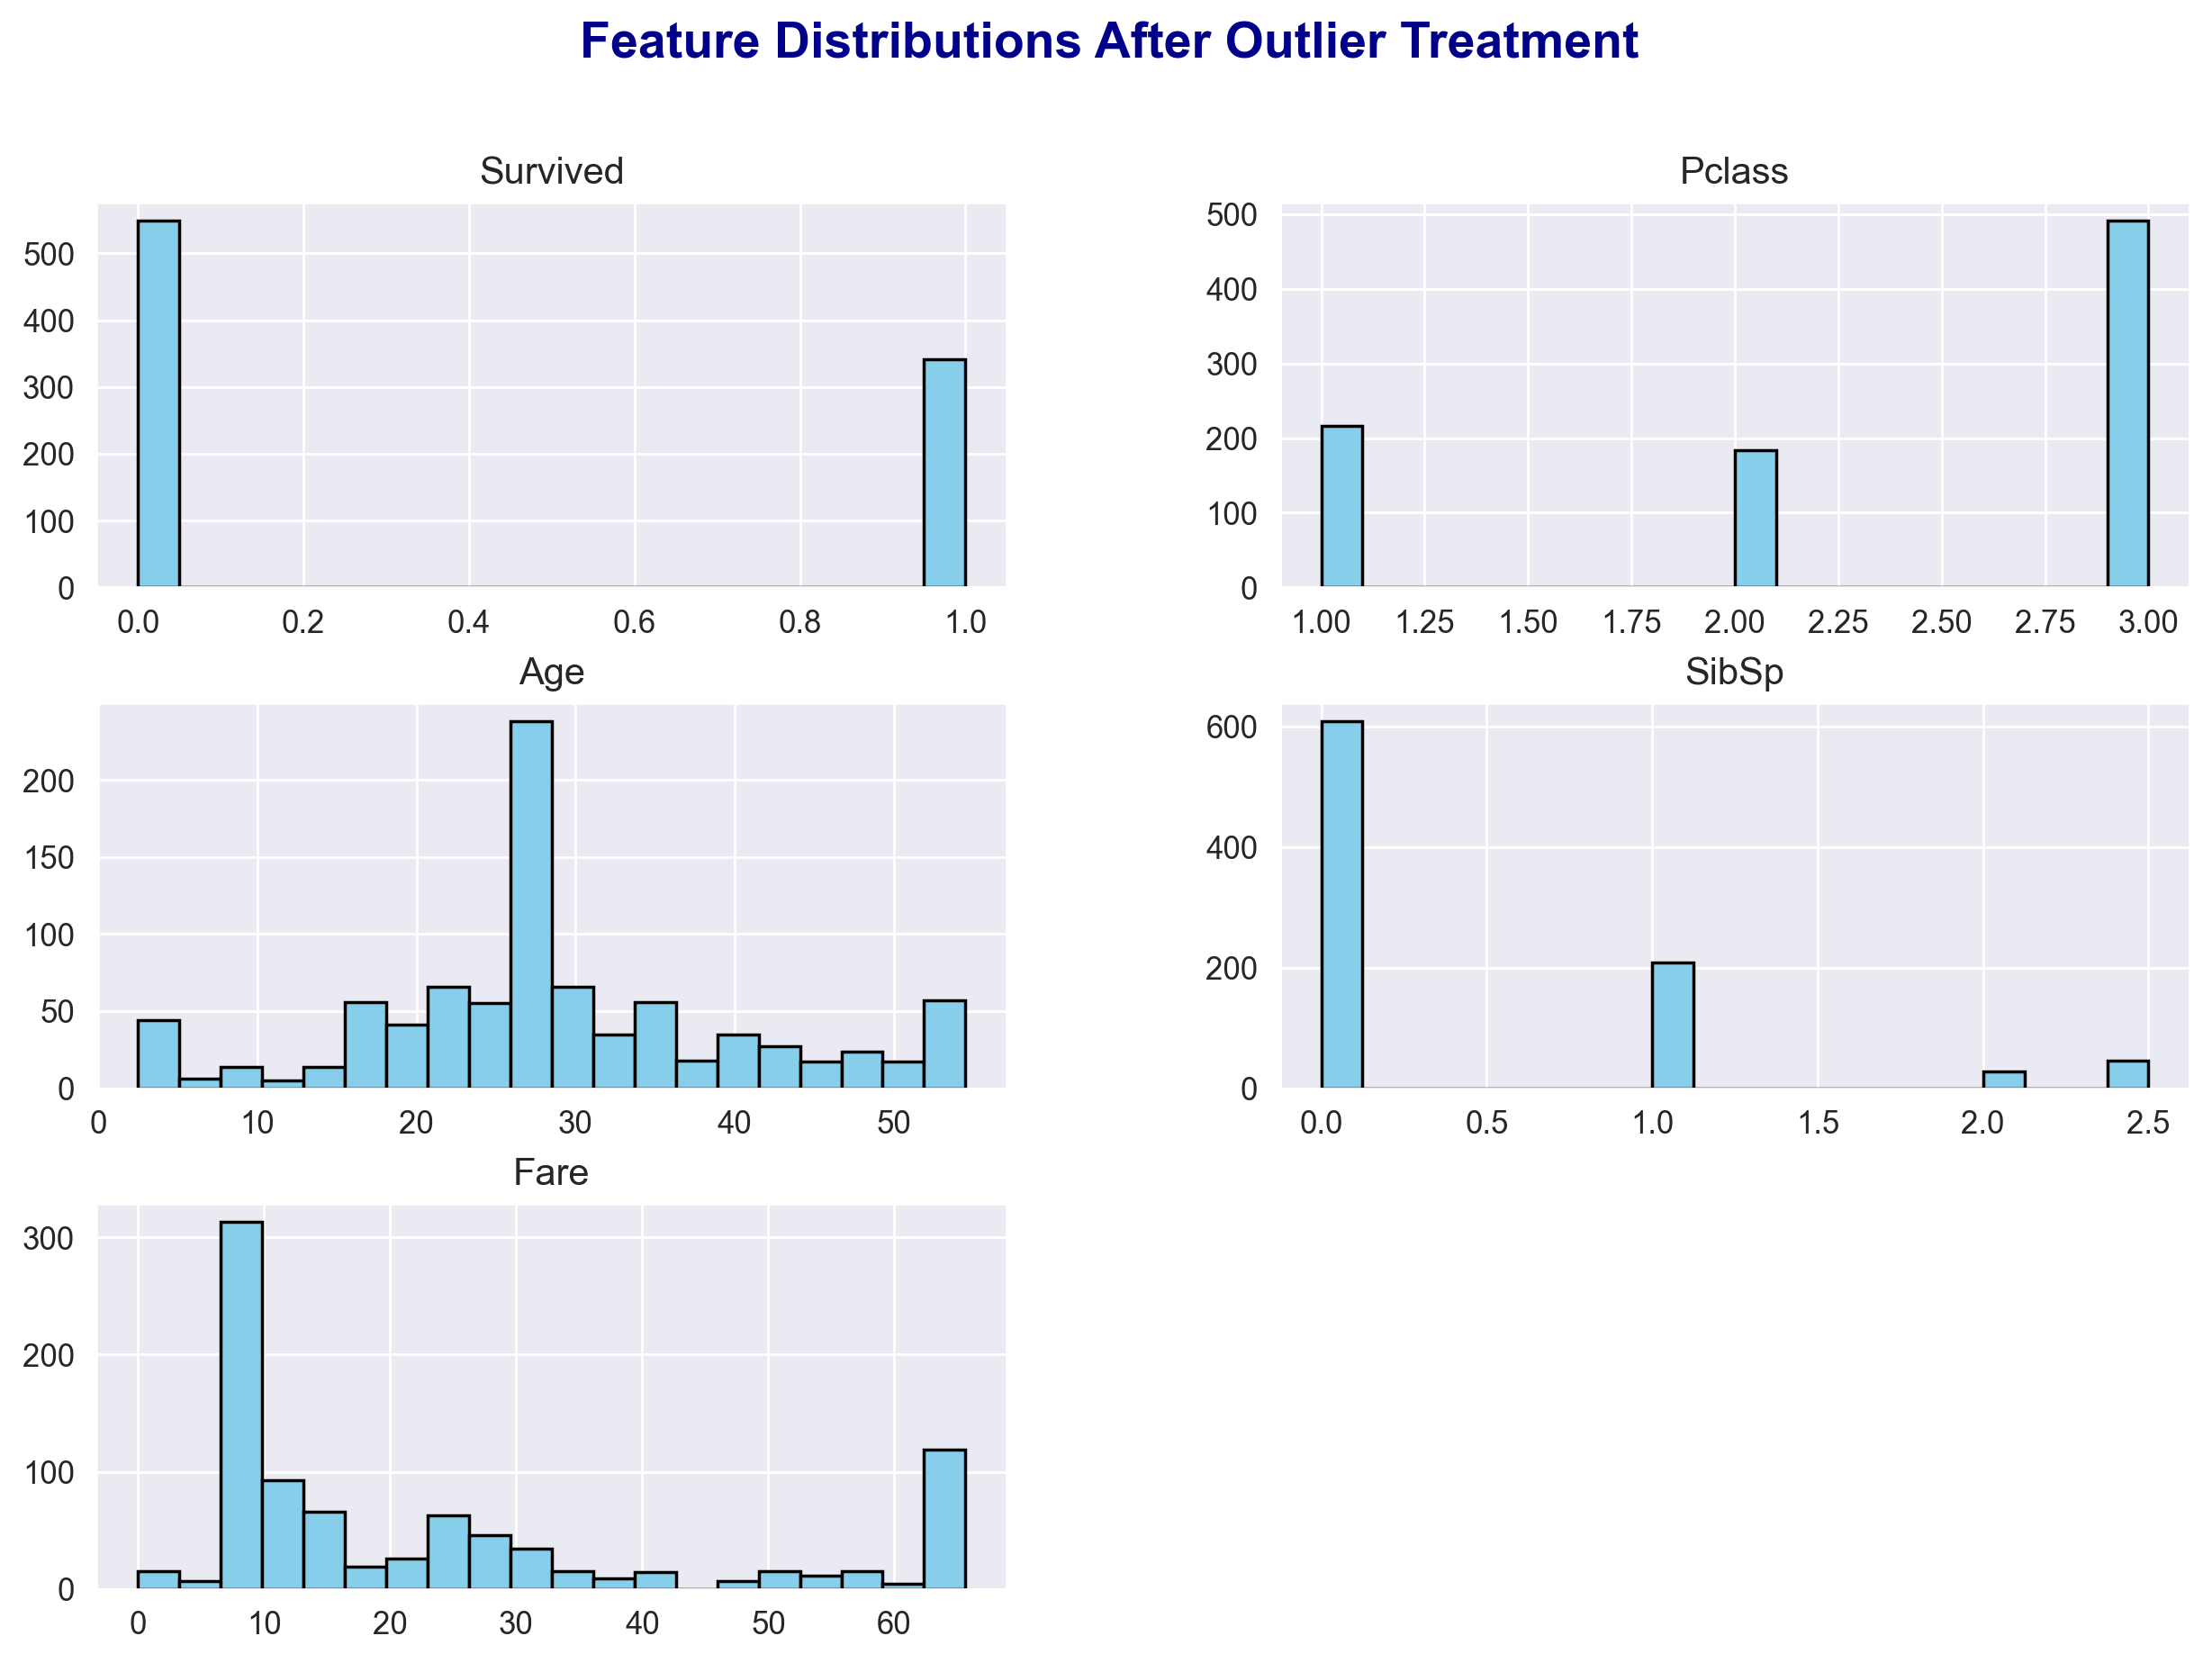

In [14]:
df1.hist(figsize=(12, 8),bins=20,color="skyblue",edgecolor="black")
plt.suptitle("Feature Distributions After Outlier Treatment", fontsize=16, color="darkblue", weight="bold")

In [15]:
df1.drop_duplicates()
df1.reset_index()
# droped duplicates if present 

,index,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,0,3,male,22.0,1.0,7.2500,S
1,1,1,1,female,38.0,1.0,65.6344,C
2,2,1,3,female,26.0,0.0,7.9250,S
3,3,1,1,female,35.0,1.0,53.1000,S
4,4,0,3,male,35.0,0.0,8.0500,S
...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0.0,13.0000,S
887,887,1,1,female,19.0,0.0,30.0000,S
888,888,0,3,female,28.0,1.0,23.4500,S
889,889,1,1,male,26.0,0.0,30.0000,C


In [16]:
sex_mapping = {'male': 0, 'female': 1}
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}

df1['Sex'] = df1['Sex'].map(sex_mapping)
df1['Embarked'] = df1['Embarked'].map(embarked_mapping)
# converting to num col of model building 

In [18]:
df1.corr()
# find the relation btw cols 

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.060622,0.031434,0.317430,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.340404,0.023180,-0.715300,0.043835
Sex,0.543351,-0.131900,1.000000,-0.074740,0.167885,0.234969,0.118593
Age,-0.060622,-0.340404,-0.074740,1.000000,-0.247806,0.144544,-0.010162
SibSp,0.031434,0.023180,0.167885,-0.247806,1.000000,0.349615,-0.046550
Fare,0.317430,-0.715300,0.234969,0.144544,0.349615,1.000000,0.013406
Embarked,0.108669,0.043835,0.118593,-0.010162,-0.046550,0.013406,1.000000


Text(0.5, 1.0, 'Correlation Heatmap - All Features')

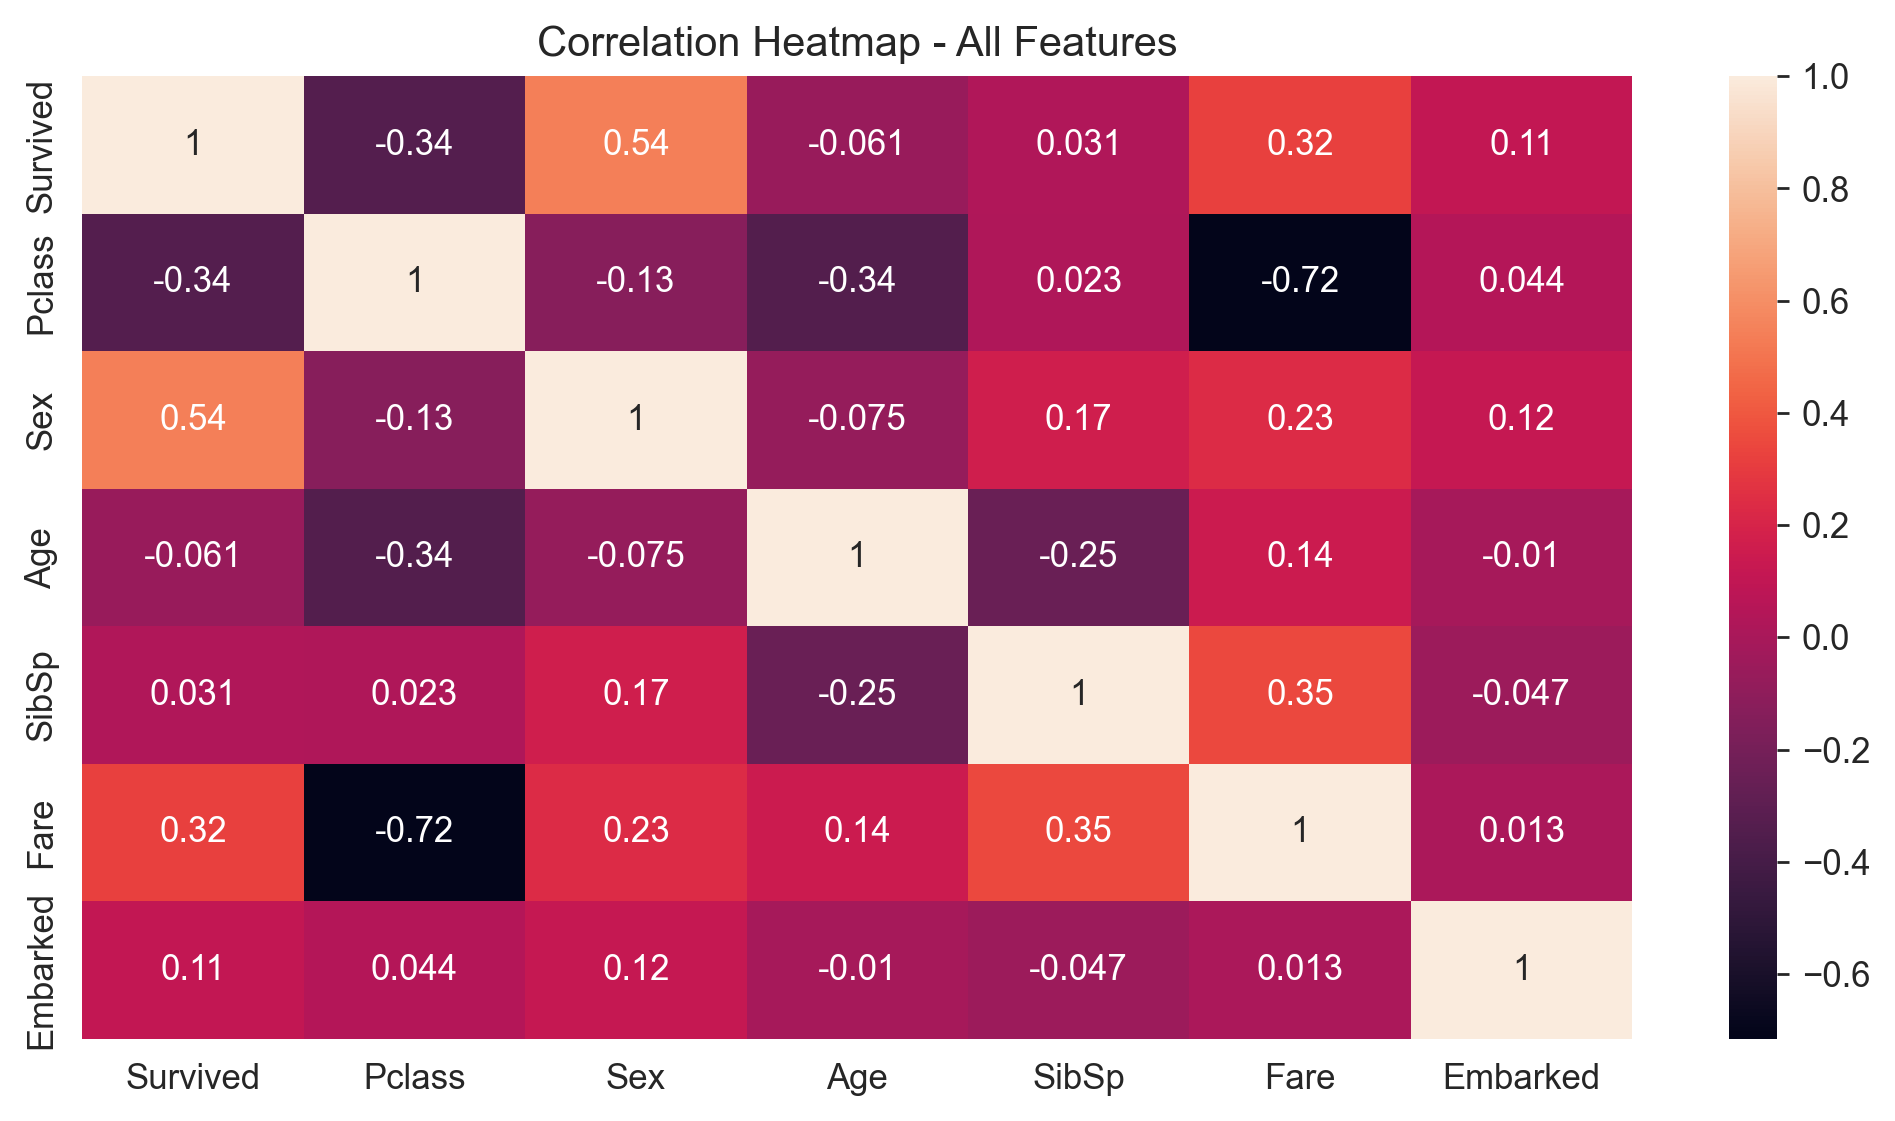

In [19]:
sns.heatmap(df1.corr(),annot=True)
plt.title("Correlation Heatmap - All Features")

In [20]:
y=df1['Survived']
x=df1.iloc[:,1:]
# selecting dependent and independent cols 

In [21]:
x.fillna(x.mean(), inplace=True)
sc=StandardScaler()
x=sc.fit_transform(x)
# scaling of x cols 

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)
# train test split 

In [23]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
# model building 

In [24]:
feature_names = df1.columns[1:]  

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_[0] 
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

coef_df
# coef of each x col 

,Feature,Coefficient
1,Sex,1.205300
5,Embarked,0.205920
4,Fare,0.106384
3,SibSp,-0.221403
2,Age,-0.456463
0,Pclass,-0.896131


In [25]:
accuracy = accuracy_score(ytest, ypred)
precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
roc_auc = roc_auc_score(ytest, lr.predict_proba(xtest)[:, 1])  # Probability-based AUC
conf_matrix = confusion_matrix(ytest, ypred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(ytest, ypred))
# evaluation 

Accuracy: 0.8101
Precision: 0.7763
Recall: 0.7763
F1-score: 0.7763
ROC-AUC Score: 0.8912

Confusion Matrix:
 [[86 17]
 [17 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.78      0.78      0.78        76

    accuracy                           0.81       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179



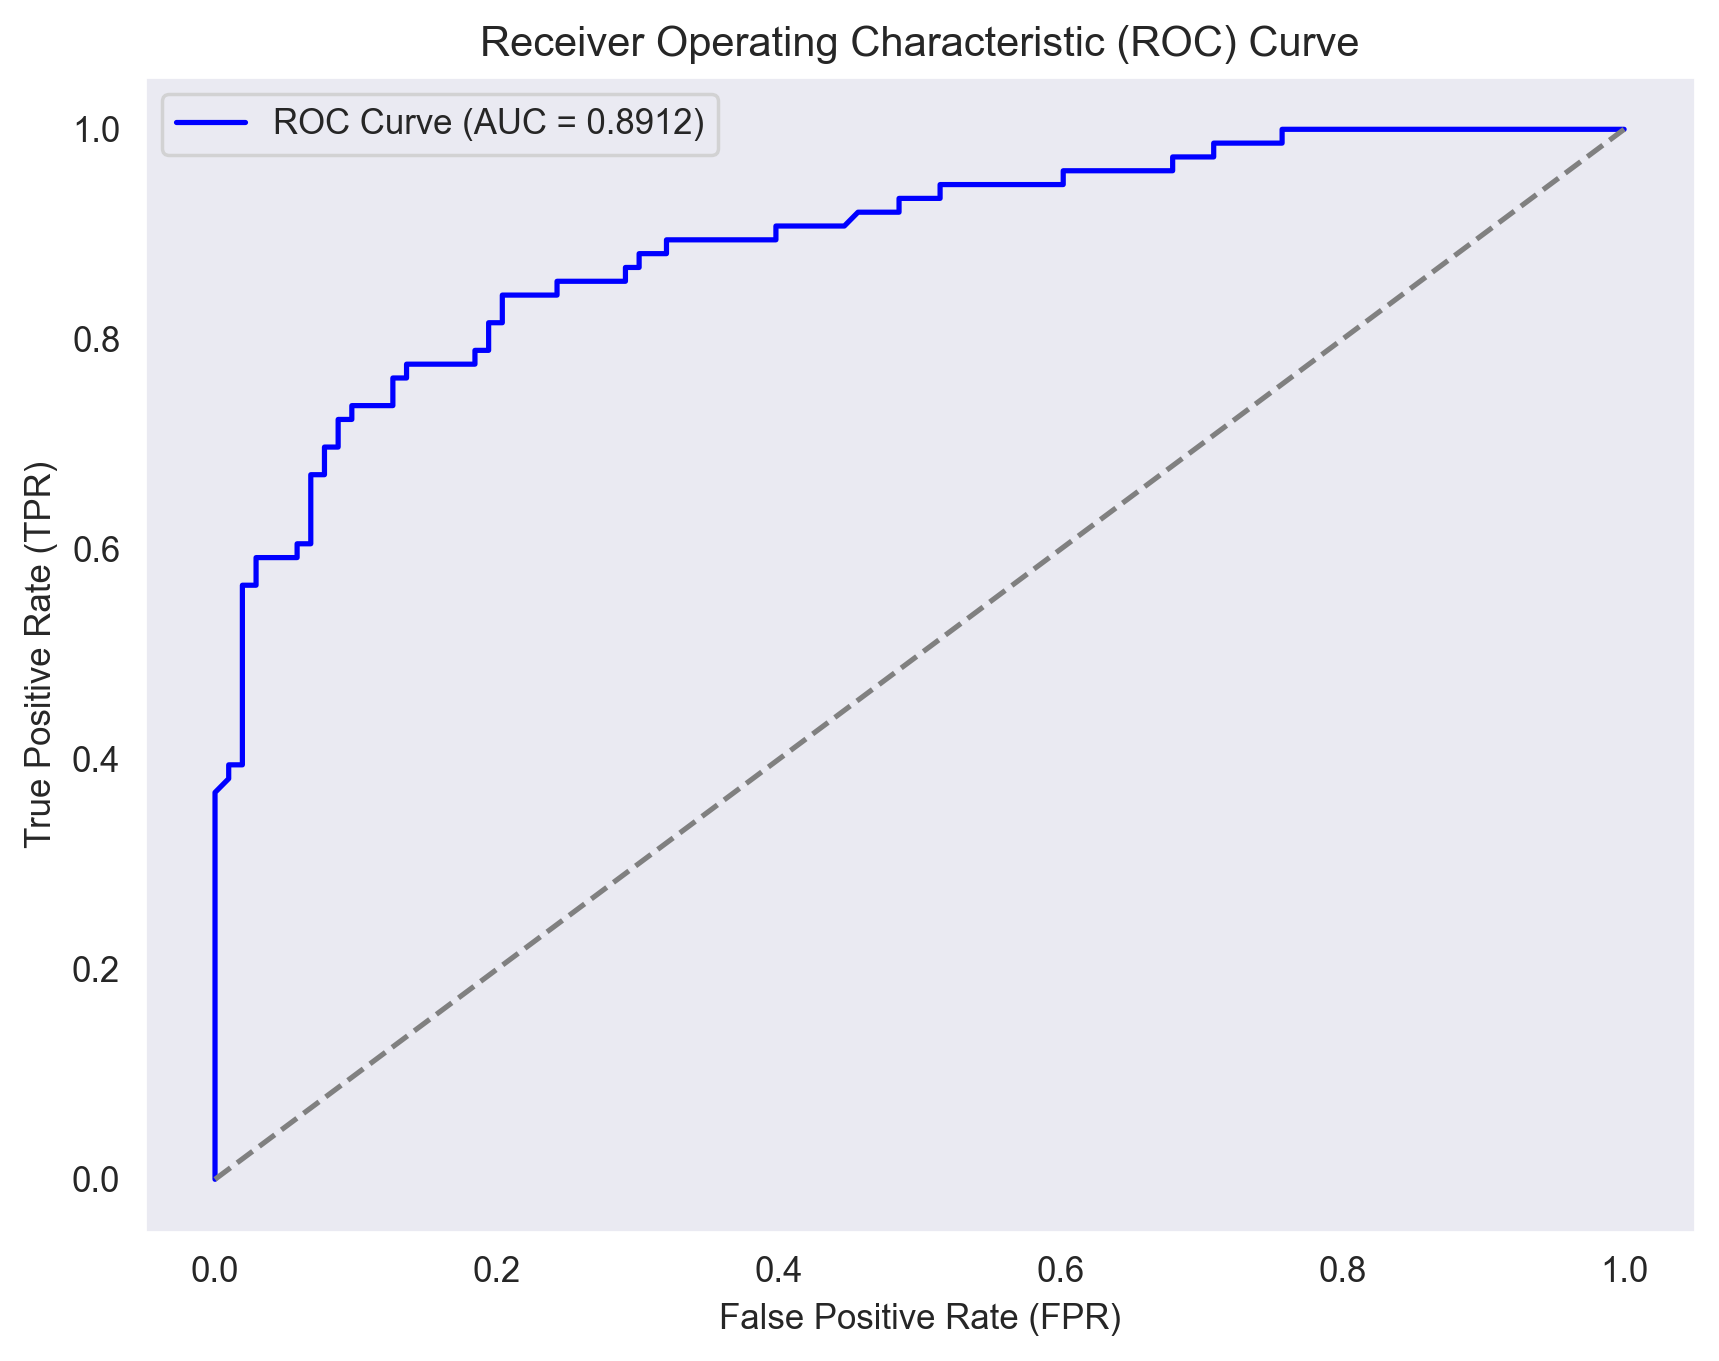

In [26]:
y_pred_proba = lr.predict_proba(xtest)[:, 1]
fpr, tpr, _ = roc_curve(ytest, y_pred_proba)
auc_score = roc_auc_score(ytest, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()

In [27]:
print(lr.score(xtrain,ytrain))
print(lr.score(xtest,ytest))
# no overfitting robust model 

0.7921348314606742
0.8100558659217877


### Pipeline

In [28]:
X = df1.drop(columns=["Survived"])
y = df1["Survived"]

categorical_features = ["Sex", "Embarked"]
numerical_features = ["Age", "SibSp", "Fare", "Pclass"]


numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])


model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline.fit(X_train, y_train)

cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

# Save model
joblib.dump(model_pipeline, "logistic_regression_model.pkl")
print("Model saved successfully!")


Cross-validation accuracy scores: [0.8041958  0.8041958  0.77464789 0.74647887 0.78169014]
Mean accuracy: 0.7822417019600117
Model saved successfully!


# Evaluation on test data

In [32]:
# Load test data
df_test = pd.read_csv("Titanic_test.csv")

# Drop irrelevant columns (same as training)
df_test.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket', 'Parch'], inplace=True)

# Define features (same as training)
categorical_features = ["Sex", "Embarked"]
numerical_features = ["Age", "SibSp", "Fare", "Pclass"]

# Load the saved model pipeline
model_pipeline = joblib.load("logistic_regression_model.pkl")

capping(df_test, ["Fare", "SibSp", "Age"])

In [33]:
# Make predictions on test data
y_pred_test = model_pipeline.predict(df_test)

# Add predictions to test dataframe
df_test['Predicted_Survived'] = y_pred_test

# Save predictions to a new CSV file
df_test.to_csv("Titanic_test_predictions.csv", index=False)
print("Predictions saved to 'Titanic_test_predictions.csv'")

Predictions saved to 'Titanic_test_predictions.csv'
